In [1]:
using Plots, OrdinaryDiffEq, DiffEqPhysics, RecursiveArrayTools

┌ Info: Precompiling OrdinaryDiffEq [1dea7af3-3e70-54e6-95c3-0bf5283fa5ed]
└ @ Base loading.jl:1260
┌ Info: Precompiling DiffEqPhysics [055956cb-9e8b-5191-98cc-73ae4a59e68a]
└ @ Base loading.jl:1260


In [2]:
gr()

Plots.GRBackend()

In [3]:
G = 2.95912208286e-4
M = [1.00000597682, 0.000954786104043, 0.000285583733151, 0.0000437273164546, 0.0000517759138449, 1/1.3e8]
planets = ["Sun", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"]

6-element Array{String,1}:
 "Sun"
 "Jupiter"
 "Saturn"
 "Uranus"
 "Neptune"
 "Pluto"

In [4]:
pos_x = [0.0,-3.5023653,9.0755314,8.3101420,11.4707666,-15.5387357]
pos_y = [0.0,-3.8169847,-3.0458353,-16.2901086,-25.7294829,-25.2225594]
pos_z = [0.0,-1.5507963,-1.6483708,-7.2521278,-10.8169456,-3.1902382]
pos = ArrayPartition(pos_x,pos_y,pos_z)

([0.0, -3.5023653, 9.0755314, 8.310142, 11.4707666, -15.5387357], [0.0, -3.8169847, -3.0458353, -16.2901086, -25.7294829, -25.2225594], [0.0, -1.5507963, -1.6483708, -7.2521278, -10.8169456, -3.1902382])

In [5]:
vel_x = [0.0,0.00565429,0.00168318,0.00354178,0.00288930,0.00276725]
vel_y = [0.0,-0.00412490,0.00483525,0.00137102,0.00114527,-0.00170702]
vel_z = [0.0,-0.00190589,0.00192462,0.00055029,0.00039677,-0.00136504]
vel = ArrayPartition(vel_x,vel_y,vel_z)

([0.0, 0.00565429, 0.00168318, 0.00354178, 0.0028893, 0.00276725], [0.0, -0.0041249, 0.00483525, 0.00137102, 0.00114527, -0.00170702], [0.0, -0.00190589, 0.00192462, 0.00055029, 0.00039677, -0.00136504])

In [6]:
tspan = (0.,200_000)

(0.0, 200000)

In [7]:
const ∑ = sum
const N = 6
potential(p, t, x, y, z, M) = -G*∑(i->∑(j->(M[i]*M[j])/sqrt((x[i]-x[j])^2 + (y[i]-y[j])^2 + (z[i]-z[j])^2), 1:i-1), 2:N)

potential (generic function with 1 method)

In [8]:
nprob = NBodyProblem(potential, M, pos, vel, tspan)
sol = solve(nprob,Yoshida6(), dt=100);

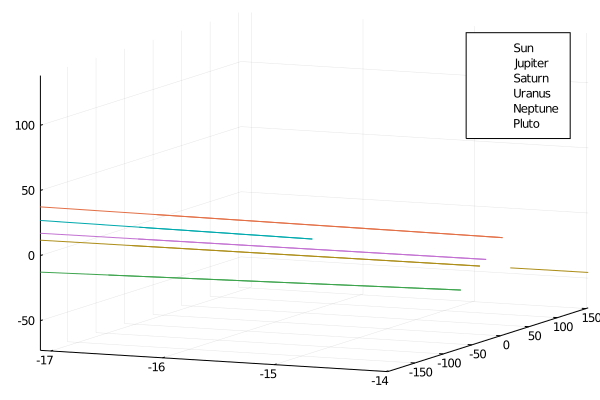

In [9]:
orbitplot(sol,body_names=planets)